# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint


# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 599


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{url}appid={weather_api_key}&units={units}&q={city}'
    #city_url = url + "appid=" + weather_api_key + "&q=" + city
    
    time.sleep(1)

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url)
        weather_json = city_weather.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = weather_json['coord']['lat']
        city_lng = weather_json['coord']['lon']
        city_max_temp = weather_json['main']['temp_max']
        city_humidity = weather_json['main']['humidity']
        city_clouds = weather_json['clouds']['all']
        city_wind = weather_json['wind']['speed']
        city_country = weather_json['sys']['country']
        city_date = weather_json['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
    
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | waitangi
Processing Record 2 of Set 1 | adamstown
Processing Record 3 of Set 1 | olonkinbyen
Processing Record 4 of Set 1 | bethel
Processing Record 5 of Set 1 | arraial do cabo
Processing Record 6 of Set 1 | grytviken
Processing Record 7 of Set 1 | hermanus
Processing Record 8 of Set 1 | port-aux-francais
Processing Record 9 of Set 1 | mount gambier
Processing Record 10 of Set 1 | margaret river
Processing Record 11 of Set 1 | isafjordur
Processing Record 12 of Set 1 | vila velha
Processing Record 13 of Set 1 | kailua-kona
Processing Record 14 of Set 1 | blackmans bay
Processing Record 15 of Set 1 | tanjung selor
City not found. Skipping...
Processing Record 16 of Set 1 | kirgiz-miyaki
Processing Record 17 of Set 1 | hirara
Processing Record 18 of Set 1 | san antonio de pale
Processing Record 19 of Set 1 | cozumel
Processing Record 20 of Set 1 | shimoda
Processing Record 21 of Set 1 | luderitz
P

Processing Record 38 of Set 4 | lata
Processing Record 39 of Set 4 | mareeba
Processing Record 40 of Set 4 | talnakh
Processing Record 41 of Set 4 | kasongo-lunda
Processing Record 42 of Set 4 | ahero
Processing Record 43 of Set 4 | creel
Processing Record 44 of Set 4 | kavieng
Processing Record 45 of Set 4 | prey veng
Processing Record 46 of Set 4 | ahau
City not found. Skipping...
Processing Record 47 of Set 4 | filey
Processing Record 48 of Set 4 | las heras
Processing Record 49 of Set 4 | mao
Processing Record 0 of Set 5 | peterhead
Processing Record 1 of Set 5 | port shepstone
Processing Record 2 of Set 5 | rundu
Processing Record 3 of Set 5 | ormond-by-the-sea
Processing Record 4 of Set 5 | taltal
Processing Record 5 of Set 5 | hotan
Processing Record 6 of Set 5 | iskushuban
Processing Record 7 of Set 5 | pisco
Processing Record 8 of Set 5 | piterka
Processing Record 9 of Set 5 | beni
Processing Record 10 of Set 5 | yarmouth
Processing Record 11 of Set 5 | uturoa
Processing Recor

Processing Record 28 of Set 8 | taro
Processing Record 29 of Set 8 | esquina
Processing Record 30 of Set 8 | alice town
Processing Record 31 of Set 8 | tommot
Processing Record 32 of Set 8 | levelland
Processing Record 33 of Set 8 | prince george
Processing Record 34 of Set 8 | egilsstadir
Processing Record 35 of Set 8 | piti village
Processing Record 36 of Set 8 | kualakapuas
Processing Record 37 of Set 8 | santa elena de uairen
Processing Record 38 of Set 8 | novyy urgal
Processing Record 39 of Set 8 | rio gallegos
Processing Record 40 of Set 8 | nebraska city
Processing Record 41 of Set 8 | al bardiyah
Processing Record 42 of Set 8 | banda aceh
Processing Record 43 of Set 8 | shetpe
Processing Record 44 of Set 8 | kalmunai
Processing Record 45 of Set 8 | alliance
Processing Record 46 of Set 8 | tanggu
Processing Record 47 of Set 8 | talara
Processing Record 48 of Set 8 | siofok
Processing Record 49 of Set 8 | hihifo
City not found. Skipping...
Processing Record 0 of Set 9 | selfoss


Processing Record 15 of Set 12 | sanming
Processing Record 16 of Set 12 | sodra sandby
Processing Record 17 of Set 12 | north haven
Processing Record 18 of Set 12 | zeya
Processing Record 19 of Set 12 | surgut
Processing Record 20 of Set 12 | vorkuta
Processing Record 21 of Set 12 | severo-yeniseyskiy
Processing Record 22 of Set 12 | saint-paul-les-dax
Processing Record 23 of Set 12 | kenai
Processing Record 24 of Set 12 | manado
Processing Record 25 of Set 12 | marsa alam
Processing Record 26 of Set 12 | baidoa
Processing Record 27 of Set 12 | monteria
Processing Record 28 of Set 12 | hola
Processing Record 29 of Set 12 | gaspe
Processing Record 30 of Set 12 | san agustin de valle fertil
Processing Record 31 of Set 12 | nuevo ideal
Processing Record 32 of Set 12 | babu
Processing Record 33 of Set 12 | sorong
Processing Record 34 of Set 12 | puerto lleras
Processing Record 35 of Set 12 | sanghar
Processing Record 36 of Set 12 | carutapera
Processing Record 37 of Set 12 | eureka
Process

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)


# Show Record Count
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,waitangi,-43.9535,-176.5597,13.79,87,1,2.24,NZ,1690852342
1,adamstown,-25.0660,-130.1015,19.44,60,86,10.32,PN,1690852343
2,olonkinbyen,70.9221,-8.7187,6.49,93,99,0.37,SJ,1690852345
3,bethel,41.3712,-73.4140,22.64,68,75,0.00,US,1690852346
4,arraial do cabo,-22.9661,-42.0278,20.31,81,49,5.70,BR,1690852347
...,...,...,...,...,...,...,...,...,...
564,saldanha,-33.0117,17.9442,9.50,77,5,3.42,ZA,1690853080
565,la paz,-16.5000,-68.1500,7.99,19,1,2.06,BO,1690853081
566,koszalin,54.1944,16.1722,13.71,94,100,6.18,PL,1690853083
567,richards bay,-28.7830,32.0377,17.30,60,83,2.59,ZA,1690853084


In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,waitangi,-43.9535,-176.5597,13.79,87,1,2.24,NZ,1690852342
1,adamstown,-25.0660,-130.1015,19.44,60,86,10.32,PN,1690852343
2,olonkinbyen,70.9221,-8.7187,6.49,93,99,0.37,SJ,1690852345
3,bethel,41.3712,-73.4140,22.64,68,75,0.00,US,1690852346
4,arraial do cabo,-22.9661,-42.0278,20.31,81,49,5.70,BR,1690852347


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,13.79,87,1,2.24,NZ,1690852342
1,adamstown,-25.0660,-130.1015,19.44,60,86,10.32,PN,1690852343
2,olonkinbyen,70.9221,-8.7187,6.49,93,99,0.37,SJ,1690852345
3,bethel,41.3712,-73.4140,22.64,68,75,0.00,US,1690852346
4,arraial do cabo,-22.9661,-42.0278,20.31,81,49,5.70,BR,1690852347


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

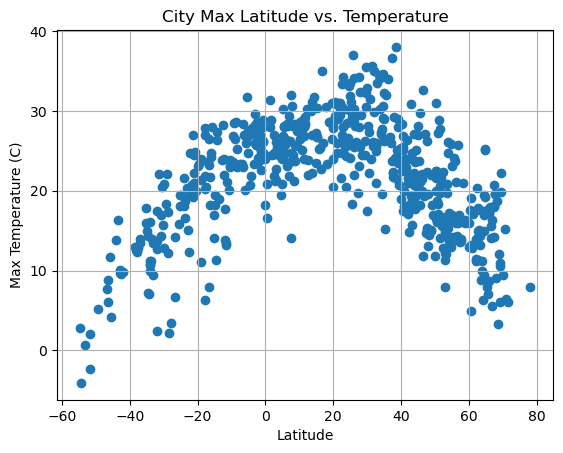

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'])

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

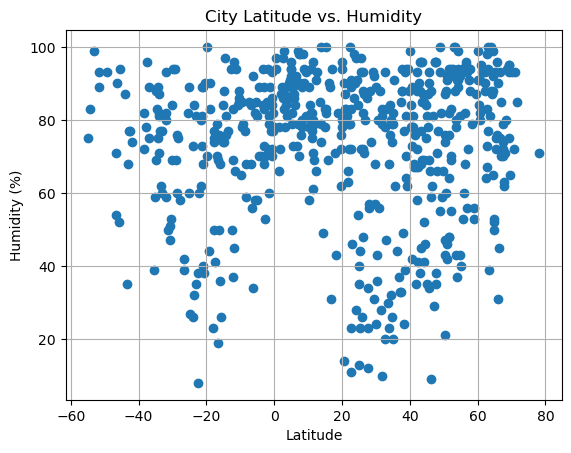

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'])

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

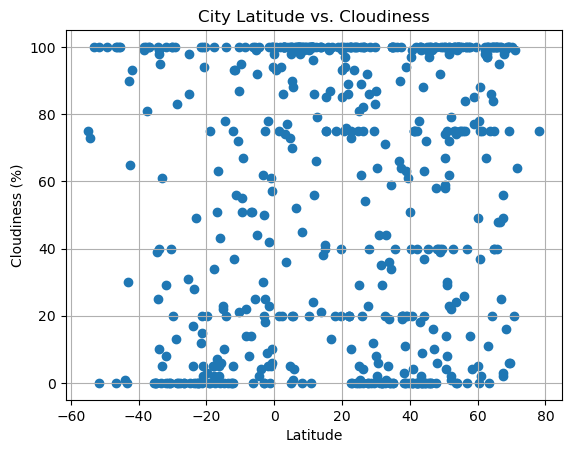

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'])

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

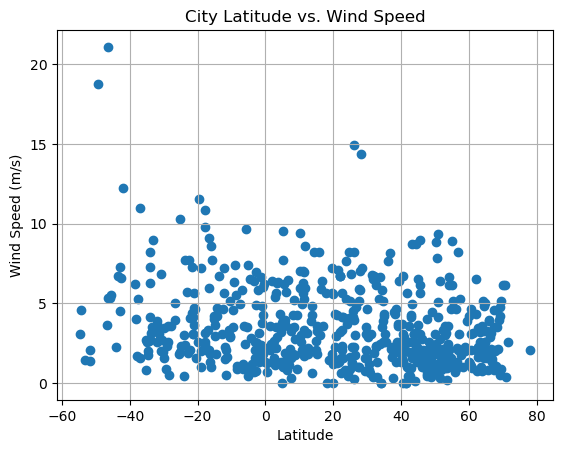

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'])

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
from scipy.stats import linregress

In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,olonkinbyen,70.9221,-8.7187,6.49,93,99,0.37,SJ,1690852345
3,bethel,41.3712,-73.4140,22.64,68,75,0.00,US,1690852346
10,isafjordur,66.0755,-23.1240,8.72,90,48,1.83,IS,1690852354
12,kailua-kona,19.6406,-155.9956,30.98,72,20,7.20,US,1690852357
14,kirgiz-miyaki,53.6324,54.7979,14.50,92,74,2.28,RU,1690852360


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,13.79,87,1,2.24,NZ,1690852342
1,adamstown,-25.0660,-130.1015,19.44,60,86,10.32,PN,1690852343
4,arraial do cabo,-22.9661,-42.0278,20.31,81,49,5.70,BR,1690852347
5,grytviken,-54.2811,-36.5092,-4.08,83,73,4.61,GS,1690852348
6,hermanus,-34.4187,19.2345,7.11,75,25,2.65,ZA,1690852349


###  Temperature vs. Latitude Linear Regression Plot

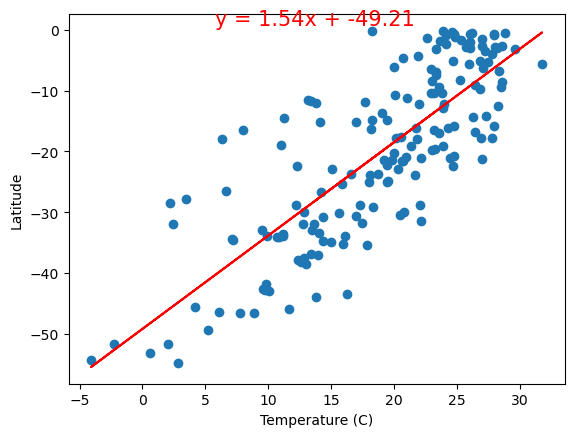

In [18]:
# Linear regression on Northern Hemisphere
x_values = southern_hemi_df['Max Temp']
y_values = southern_hemi_df['Lat']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(15,0.8),fontsize=15,color="red")
plt.xlabel('Temperature (C)')
plt.ylabel('Latitude')
plt.show()

In [ ]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE